## 1. numpy 随机数据生成API

numpy 适合简单的随机抽样数据，API都在random类中。常见的有：

(1) rand(d0,d1,...,dn) 用来生成 d0\*d1\*d2\*...\*dn维的数据，数值在[0,1]中。  

(2) randn(d0,d1,...,dn) 同样用来生成 d0\*d1\*d2\*...\*dn维[0,1]之间的数据，此外，生成的数据服从(0,1)正态分布。  
　　若要生成服从(a,b^2)的分布，只需要对生成的服从(0,1)分布的数据x进行 b\*x+a 的运算即可。  
  
(3) randint(low, high=None, size=None, dtype='l') ,生成值位于半开区间\[low, high) 之间尺寸为size的数据。

(4) random_integers 与randint类似没区别在于它生成闭区间内的数

(5) random_sample([size]) 返回[0.0,1.0)之间的随机浮点数


In [4]:
import numpy as np
np.random.rand(2,3)

array([[0.89710476, 0.24217534, 0.88993414],
       [0.52037449, 0.85137199, 0.17121718]])

## 2. sklearn 随机数生成API

sklearn生成随机数的方法都在sklearn.datasets中，相比numpy而言，sklearn更适合生成特定模型的随机数据。

(1) 用make_regression 生成回归模型的数据

(2) 用make_hastie_10_2，make_classification或者make_multilabel_classification生成分类模型数据

(3) 用make_blobs生成聚类模型数据

(4) 用make_gaussian_quantiles生成分组多维正态分布的数据


### 2.1 用make_regression 生成回归模型的数据

关键参数有n_samples(生成样本数) n_features(生成样本特征数) noise(标准高斯噪声的标准差) coef(是否返回回归系数)

help(make_regression)

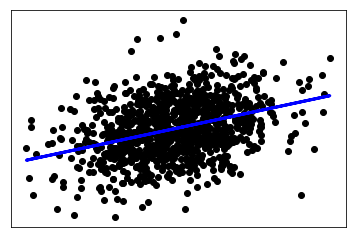

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets.samples_generator import make_regression
# X为样本特征，y为样本输出， coef为回归系数，共1000个样本，每个样本1个特征
X, y, coef =make_regression(n_samples=1000, n_features=1,noise=10, coef=True)
# 画图
plt.scatter(X, y,  color='black')
plt.plot(X, X*coef, color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## 2.2生成分类模型数据

这里我们用make_classification生成三元分类模型数据。几个关键参数有n_samples（生成样本数）， n_features（样本特征数）， n_redundant（冗余特征数）和n_classes（输出的类别数），例子代码如下

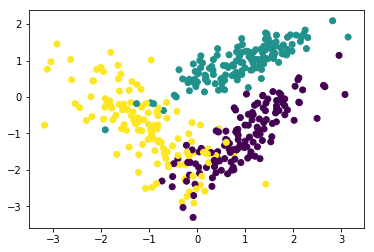

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets.samples_generator import make_classification
# X1为样本特征，Y1为样本类别输出， 共400个样本，每个样本2个特征，输出有3个类别，没有冗余特征，每个类别一个簇
X1, Y1 = make_classification(n_samples=400, n_features=2, n_redundant=0,
                             n_clusters_per_class=1, n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)
plt.show()

In [15]:
help(make_classification)

Help on function make_classification in module sklearn.datasets.samples_generator:

make_classification(n_samples=100, n_features=20, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
    Generate a random n-class classification problem.
    
    This initially creates clusters of points normally distributed (std=1)
    about vertices of an `n_informative`-dimensional hypercube with sides of
    length `2*class_sep` and assigns an equal number of clusters to each
    class. It introduces interdependence between these features and adds
    various types of further noise to the data.
    
    Prior to shuffling, `X` stacks a number of these primary "informative"
    features, "redundant" linear combinations of these, "repeated" duplicates
    of sampled features, and arbitrary noise for and remaining features.
    
    Read more in the :ref:`Us

## 2.3 生成聚类数据

这里我们用make_blobs生成聚类模型数据。几个关键参数有n_samples（生成样本数）， n_features（样本特征数），centers(簇中心的个数或者自定义的簇中心)和cluster_std（簇数据方差，代表簇的聚合程度）。例子如下：

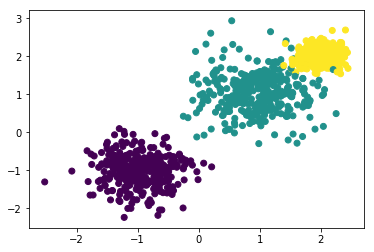

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs
# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本2个特征，共3个簇，簇中心在[-1,-1], [1,1], [2,2]， 簇方差分别为[0.4, 0.5, 0.2]
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1,-1], [1,1], [2,2]], cluster_std=[0.4, 0.5, 0.2])
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()


## 2.4 分组正态分布混合数据

我们用 make_gaussian_quantiles 生成分组正太分布混合数据。各维数据相互独立，且方差相同，均值可不同。各组数据按照同心嵌套多维球来进行等分。

几个关键参数有n_samples（生成样本数,每个类别等分）， n_features（正态分布的维数），mean（array of shape \[n_features\]，特征均值，默认为0向量）， cov（样本协方差的系数，协方差矩阵等于cov\*单位矩阵，默认为1）， n_classes（类别数）。

若x是列向量，则协方差矩阵为x\*x'.
协方差矩阵的元素表示两个特征的相关性，正值表示正相关，负值表示负相关，0表示不相关。
协方差矩阵对角线表示个维度的方差：COV(X,X) = var(X),  COV(X,Y) = COV(Y,X)


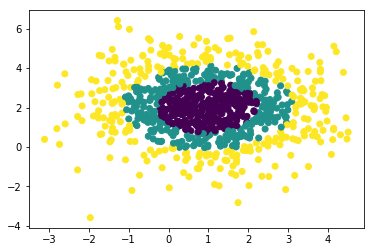

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_gaussian_quantiles

# X为样本特征[n_sanmples,n_features]，Y为类别标签， 共1000个样本，每个样本2个特征，共3个簇，簇中心在[-1,-1], [1,1], [2,2]， 簇方差分别为[0.4, 0.5, 0.2]
X, y = make_gaussian_quantiles(n_samples=900, n_features=2, cov= 2,mean=[1, 2], n_classes=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

